<a href="https://colab.research.google.com/github/tnatani/playtore-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

INTRODUCTION

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to download applications developed and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.
The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from the course.

DATA PREPARATION AND CLEANING 

In this section, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the apps and reviews data into pandas dataframe
apps_df = pd.read_csv('/content/drive/MyDrive/Almabetter /Play Store Data.csv')

In [4]:
# look at the first 10 records in the apps dataframe
apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
# look at the random 10 records in the apps dataframe
apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2791,Newegg Mobile,SHOPPING,4.5,35497,16M,"1,000,000+",Free,0,Everyone,Shopping,"July 11, 2018",4.16.0,4.4 and up
2587,TextNow - free text + calls,SOCIAL,4.4,441189,Varies with device,"10,000,000+",Free,0,Everyone,Social,"August 3, 2018",Varies with device,Varies with device
5707,HD Video Player - Video & MP3 Player | AV Play...,VIDEO_PLAYERS,4.4,22,19M,"5,000+",Free,0,Everyone,Video Players & Editors,"March 6, 2018",1.0.1,4.0 and up
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,"5,000,000+",Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.4,4.2 and up
2907,EyeEm - Camera & Photo Filter,PHOTOGRAPHY,4.2,215343,44M,"10,000,000+",Free,0,Everyone,Photography,"July 14, 2018",6.4.3,4.0.3 and up
8924,La Poupée du Voyant,FAMILY,4.4,265,8.2M,"50,000+",Free,0,Everyone,Entertainment,"January 6, 2017",1.0.0,4.1 and up
7449,Sin City Hero : Crime Simulator of Vegas,GAME,4.1,3371,78M,"100,000+",Free,0,Teen,Action,"September 8, 2017",1.1,4.0.3 and up
4431,Obbligo o Verità? PRO,GAME,NaN,4,2.9M,100+,Paid,$0.99,Teen,Board,"April 26, 2018","1,01",3.0 and up
8394,DG ग्राम / Digital Gram Panchayat,NEWS_AND_MAGAZINES,4.5,53,5.9M,"10,000+",Free,0,Teen,News & Magazines,"June 19, 2018",1.7,4.0 and up
2178,THE aMAZEing Labyrinth,FAMILY,3.9,1615,1.2M,"10,000+",Paid,$4.99,Everyone,Board;Brain Games,"February 9, 2016",1.0.3,4.0 and up


DESCRIPTION OF APP DATASET COLUMNS

1.App : The name of the app

2.Category : The category of the app

3.Rating : The rating of the app in the Play Store

4.Reviews : The number of reviews of the app

5.Size : The size of the app

6.Install : The number of installs of the app

7.Type : The type of the app (Free/Paid)

8.The price of the app (0 if it is Free)

9.Content Rating :The appropiate target audience of the app

10.Genres: The genre of the app

11.Last Updated : The date when the app was last updated

12.Current Ver : The current version of the app

13.Android Ver : The minimum Android version required to run the app


In [6]:
# type of Category
apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
# type of Type
apps_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [8]:
# type of Content Rating
apps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [9]:
# type of Genres
apps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [10]:
# look at the info of the dataframe
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the data frame, we know that:

1.There are 13 columns of properties with 10841 rows of data.

2.Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

3.Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

4.Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

5.Values of column 'Price' are strings representing price with symbol '$'.Hence, we will need to do some data cleaning.

Some Data Cleaning

In [11]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in apps_df['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

apps_df['Reviews'] = clean_reviews(reviews)
apps_df['Reviews'] = apps_df['Reviews'].astype(float)

In [12]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = apps_df[apps_df['Size'] == '1,000+'].index
apps_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in apps_df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

apps_df['Size'] = clean_sizes(sizes)
apps_df['Size'] = apps_df['Size'].astype(float)

In [13]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in apps_df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
apps_df['Installs'] = clean_installs(installs)
apps_df['Installs'] = apps_df['Installs'].astype(float)

In [14]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in apps_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

apps_df['Price'] = clean_prices(prices)
apps_df['Price'] = apps_df['Price'].astype(float)

In [15]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1230,Kitchen Stories - Recipes & Cooking,FOOD_AND_DRINK,4.6,22015.0,0.0,1000000.0,Free,0.00,Everyone,Food & Drink,"July 6, 2018",Varies with device,5.0 and up
2054,No.Draw - Colors by Number 2018,FAMILY,4.5,235906.0,13.0,10000000.0,Free,0.00,Everyone,Entertainment;Brain Games,"July 29, 2018",1.2.0,4.1 and up
2986,ESPN Fantasy Sports,SPORTS,4.0,176448.0,10.0,5000000.0,Free,0.00,Everyone,Sports,"November 21, 2017",5.3.0,4.4 and up
10351,FE Mix - Jokes - Status - Wallpaper,FAMILY,NaN,3.0,3.0,1000.0,Free,0.00,Everyone,Entertainment,"June 2, 2018",2.1,4.4 and up
8230,DB HOME,LIFESTYLE,5.0,5.0,3.2,100.0,Free,0.00,Everyone,Lifestyle,"August 31, 2017",1.0.1,4.0 and up
705,Princess Coloring Book,EDUCATION,4.5,9770.0,39.0,5000000.0,Free,0.00,Everyone,Education;Creativity,"February 25, 2018",1.2.8,4.0 and up
6135,BG TV App,FAMILY,1.7,6.0,2.9,100.0,Free,0.00,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up
7900,Radiology CT Viewer,MEDICAL,3.6,35.0,88.0,10000.0,Free,0.00,Everyone,Medical,"January 20, 2018",2,4.0 and up
7294,Somos CG,PRODUCTIVITY,NaN,2.0,18.0,100.0,Free,0.00,Everyone,Productivity,"April 26, 2018",1.2.0,4.1 and up
6560,Bo's Matching Game,FAMILY,NaN,3.0,19.0,1000.0,Paid,0.99,Everyone,Education;Brain Games,"December 28, 2017",1.4,4.0.3 and up


In [16]:
# check on null values
apps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
# grouping the data starting with App and Reviews
apps_df = apps_df.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 
                           'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# reassign Installs values with their mean
apps_df = apps_df['Installs'].mean()
# sort the dataframe by Reviews descendingly
apps_df.sort_values(by='Reviews', ascending=False, inplace=True)
# drop duplicate rows based on App 
apps_df.drop_duplicates(subset=['App'], inplace=True)
apps_df

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
3640,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.00,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
8288,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.00,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
4756,Instagram,66577446.0,SOCIAL,4.5,0.0,Free,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
5479,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,4.0,0.0,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2211,Clash of Clans,44893888.0,GAME,4.6,98.0,Free,0.00,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,AC DC Power Monitor,1.0,LIFESTYLE,5.0,1.2,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,1.000000e+01
5528,Mindvalley U Tallinn 2018,1.0,EVENTS,5.0,21.0,Free,0.00,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up,1.000000e+02
2638,DT future1 cam,1.0,TOOLS,1.0,24.0,Free,0.00,Everyone,Tools,"March 27, 2018",3.1,2.2 and up,5.000000e+01
5412,MbH BM,1.0,MEDICAL,1.0,2.3,Free,0.00,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up,1.000000e+02


In [18]:
# check on statistical information of the dataframe
apps_df.describe()

,Reviews,Rating,Size,Price,Installs
count,8.190000e+03,8190.000000,8190.000000,8190.000000,8.190000e+03
mean,2.556849e+05,4.173346,18.661010,1.035902,9.195983e+06
std,1.986425e+06,0.536319,22.382794,16.863402,5.828358e+07
min,1.000000e+00,1.000000,0.000000,0.000000,1.000000e+00
25%,1.270000e+02,4.000000,2.800000,0.000000,1.000000e+04
50%,3.020000e+03,4.300000,9.400000,0.000000,1.000000e+05
75%,4.405325e+04,4.500000,27.000000,0.000000,1.000000e+06
max,7.815831e+07,5.000000,100.000000,400.000000,1.000000e+09


Exploratory Analysis and Visualization

Category


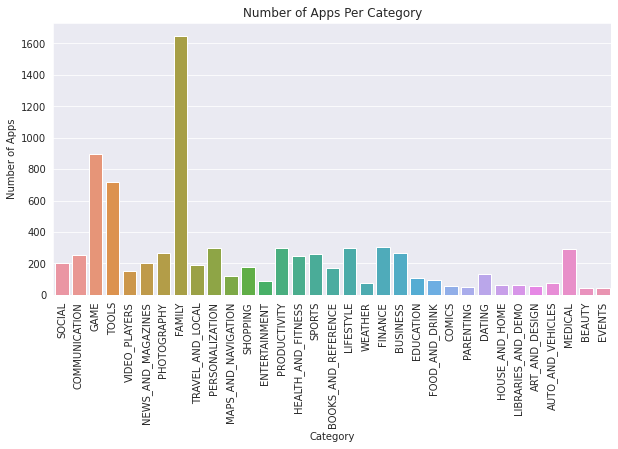

In [19]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=apps_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.


Rating

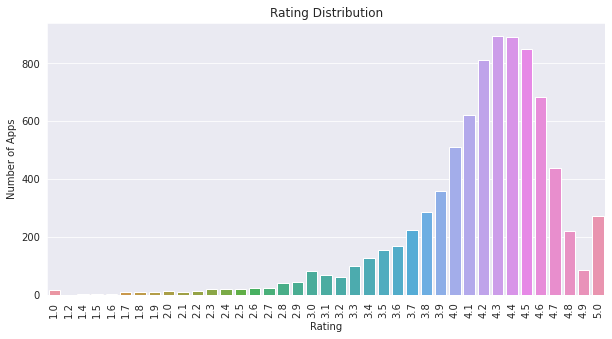

In [20]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=apps_df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

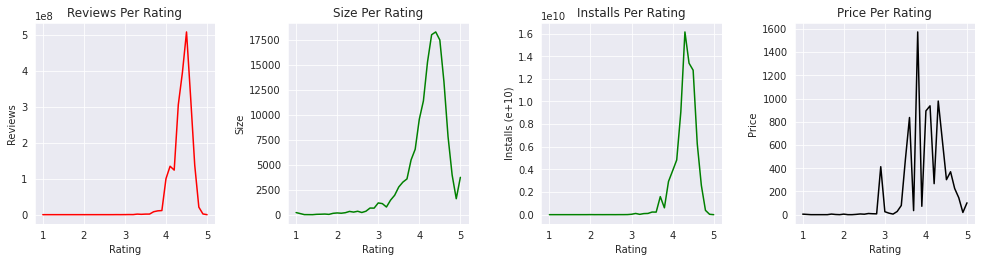

In [21]:
# plot the graphs of reviews, size, installs and price per rating
rating_df = apps_df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

APPLICATION TYPE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


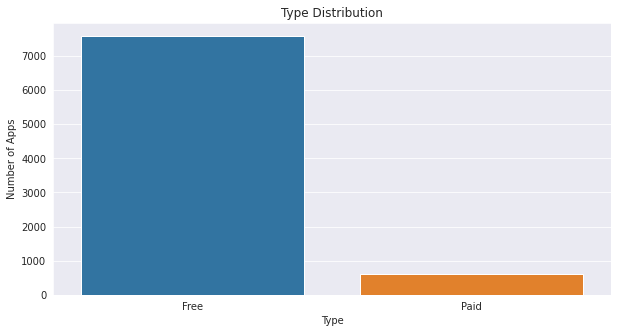

In [22]:
# application type distribution
plt.figure(figsize=(10, 5))
sns.countplot(apps_df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


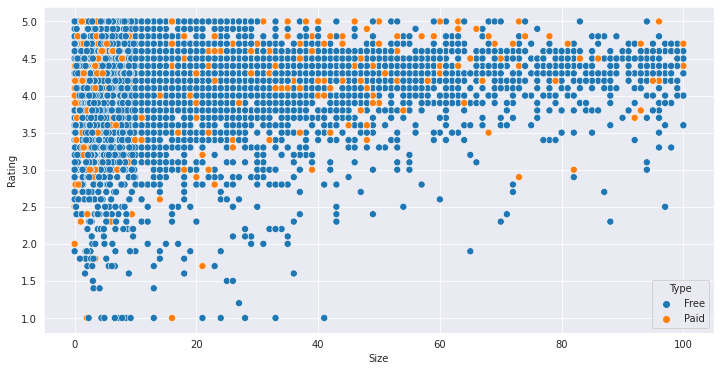

In [23]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(apps_df['Size'],
               apps_df['Rating'],
               hue=apps_df['Type'],
               s=50)


In [24]:
<matplotlib.axes._subplots.AxesSubplot at 0x7f0b7b0fb590>

SyntaxError: ignored

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

In [25]:
# correlation
apps_df.corr()

,Reviews,Rating,Size,Price,Installs
Reviews,1.000000,0.055148,0.034641,-0.007780,0.623941
Rating,0.055148,1.000000,0.037498,-0.021125,0.040232
Size,0.034641,0.037498,1.000000,-0.017397,-0.014075
Price,-0.007780,-0.021125,-0.017397,1.000000,-0.009657
Installs,0.623941,0.040232,-0.014075,-0.009657,1.000000


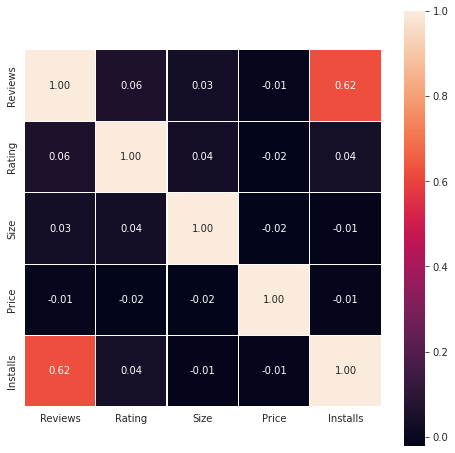

In [26]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(apps_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

In [41]:
# 1. What is the top 5 apps on the basis of installs?
df = apps_df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
3640,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
4301,Google+,4831125.0,SOCIAL,4.2,0.0,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,1.000000e+09
4286,Google Play Games,7168735.0,FAMILY,4.3,0.0,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,1.000000e+09
4273,Google News,878065.0,NEWS_AND_MAGAZINES,3.9,13.0,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,1.000000e+09
8288,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09


Histogram of log installs

In [ ]:


categoty_type_installs = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

apps_df.loc[apps_df['log_installs'] == apps_df['log_installs'].min(), 'log_installs'] = 0

plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(apps_df['log_installs']);

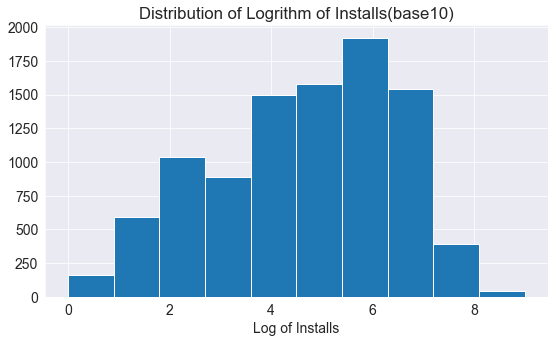

SIZE

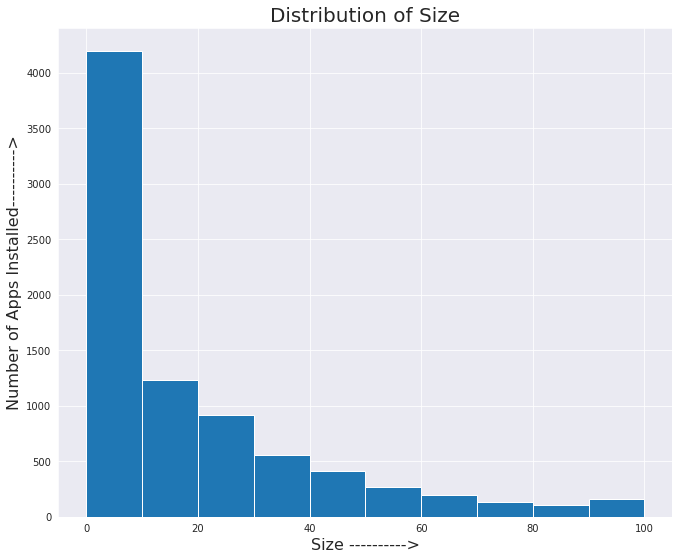

In [42]:
# PLOTTING A HISTOGRAM - SIZE VS. NUMBER OF APPS INSTALLED

plt.figure(figsize = (11, 9))
plt.hist(apps_df['Size'])

plt.title("Distribution of Size", size = 20)
plt.xlabel("Size ---------->", size = 16)
plt.ylabel('Number of Apps Installed---------->', size = 16)

plt.show()

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

USER REVIEW DATA FRAME

In [ ]:
# MERGING WITH apps_df

merged_df = apps_df.merge(user_df, on = 'App')

Merging dataframes on apps

In [ ]:
# RANDOM 10 ROWS

merged_df.sample(10)

Important Findings:

In the merged_df, we found three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity.
Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.
Sentiment Polarity is float which lies in the range of [-1, 1] where 1 means positive statement and -1 means a negative statement.
Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0, 1].

Distribution of type of reviews

In [ ]:
# MAKING A NEW DF OF CATEGORY AND SENTIMENT
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [ ]:
# COUNTING THE SENTIMENTS
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

In [ ]:

# PLOTTING THE GRAPH

plt.figure(figsize= (18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);


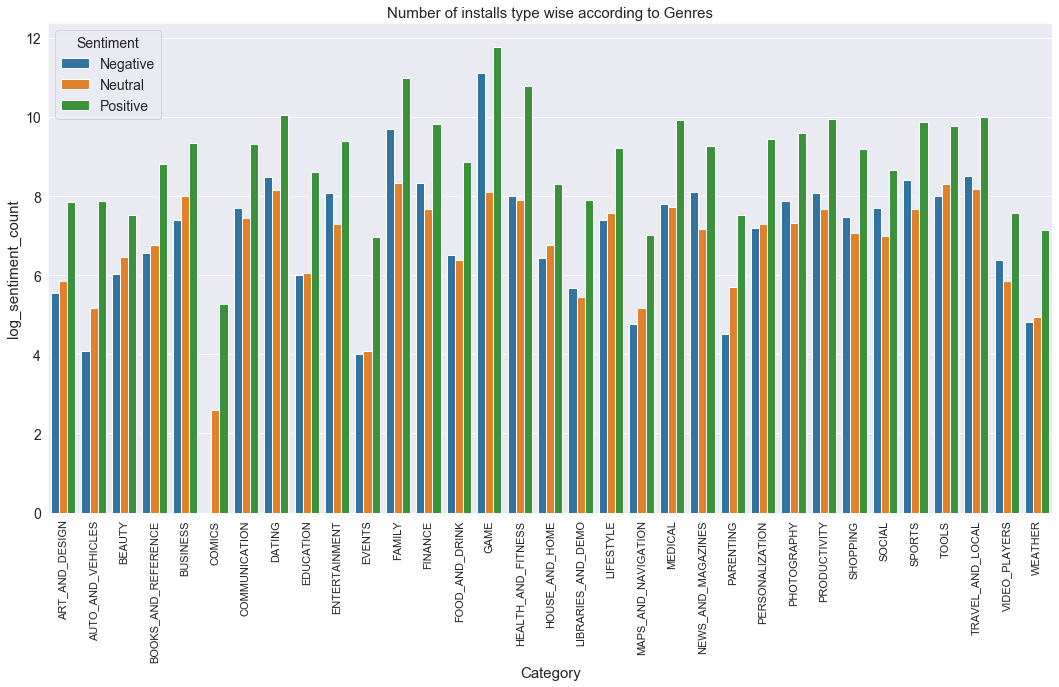

Histogram Of Subjectivity

In [ ]:
plt.figure(figsize = (18, 9))
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])

plt.xlabel("Subjectivity ---------->", size = 16)
plt.title("Distribution of Subjectivity", size = 20)

plt.show()

#### It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that macimum number of users give reviews to the applications, according to their experience.

### Does sentiment_subjectivity proportional to sentiment_polarity?

In [ ]:
# CREATING A DF 

sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename\
                                (columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

In [ ]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [ ]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

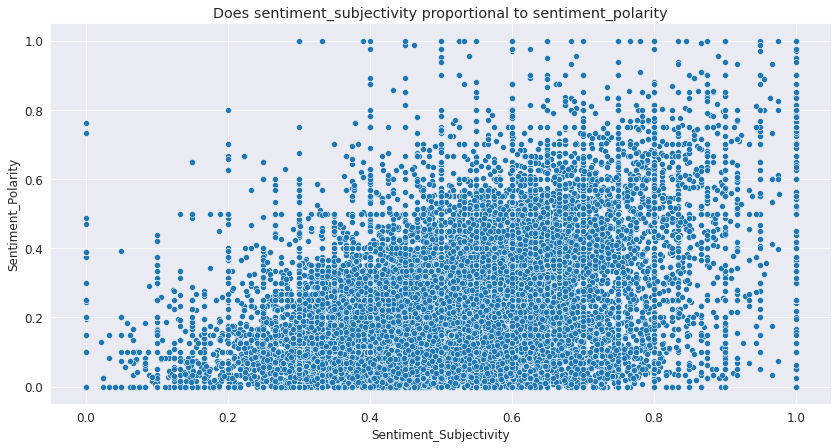

#### From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

### Percentage of Review Sentiments

In [ ]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())

labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


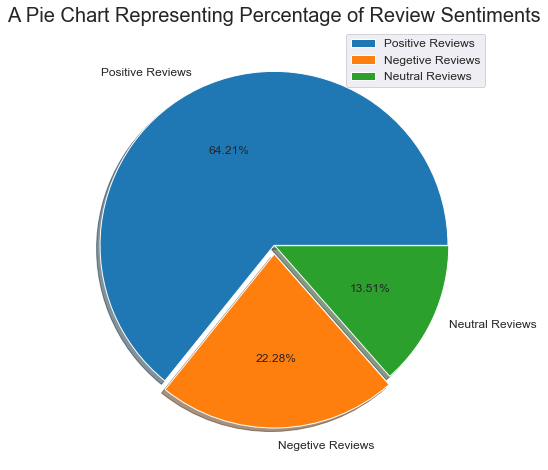